Kurset gennemgår grundlæggende Python-kode, der kan få dig i gang med at bruge programmering som redskab til tekstbehandling, kvantitative analyser og tekst- og datamining.

Mere teknisk fortalt gennemgår vi begreber som variabler, værdier, datatyperne tekststrenge, lister og loops. 

Vi gennemgår et eksempel på, hvordan man kan hente tekstdata, klargøre data og bruge NLTK biblioteket til sin analyse. NLTK er meget udbredt inden for digital tekstanalyse, og bibliotekernes metoder er f.eks. beskrevet her. https://www.nltk.org/book/ 

Samtidigt lærer du om python-programmet Jupyter Notebook, så opnår du også et kendskab til det.

# Import af biblioteker

I python importerer man ofte biblioteker for at supplere med nogle flere metoder. Det er smart, fordi det er huritgere at programmere, når man ikke skal programmere alt fra bunden. Der følger mange biblioteker med, når man installerer Anaconda. Bibliotekerne bliver også nogle gange kaldt for pakker eller moduler.

In [32]:
# Til navigation på computerne
import os

# Webscrape biblioteker
from bs4 import BeautifulSoup
import requests

# Til klargøring og analyse
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
import re

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lakj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lakj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vi laver nogle variabler, som vi bruger til at gemme de forskellige url'er til de sider, som vi vil webscrabe. 

In [33]:
# gem url'en i en variabel
url_en = 'https://en.wikipedia.org/wiki/2019%E2%80%932020_Hong_Kong_protests'
url_de = 'https://de.wikipedia.org/wiki/Proteste_in_Hongkong_2019/2020'
url_da = 'https://da.wikipedia.org/wiki/Demonstrationerne_i_Hongkong_2019-2020'

Vi indsætter et af variablenavnene i request.get('url') nedenfor.

In [34]:
# hent data
page = requests.get(url_da)

# scrape websiden
soup = BeautifulSoup(page.content, 'html.parser')

In [35]:
# find  headline1 og 3, samt paragraph-tags'
tags = soup.find_all(['h3', 'h1', 'p'])

# læs teksten ud af p_tags og 'join' den returnerede liste i variablen 'text'
text = ' '.join([p.get_text() for p in tags]).strip()

In [36]:
print (text)

Demonstrationerne i Hongkong 2019-2020 Demonstrationerne i Hongkong 2019-2020 er en række vedvarende protestaktioner og demonstrationer i det centrale Hongkong. Protesterne, som begyndte den 15. marts 2019[1] og forstærkedes i begyndelsen af juni, indledtes med, at demonstranter ville stoppe et lovforslag, som skulle tillade udlevering af formodede kriminelle fra Hongkong til Fastlandskina og andre områder, hvor udleveringsaftaler ikke findes i dag.[2] Loven blev fremsat af det pro-kinesiske styre i Hongkong med løfter om, at loven ikke skulle kunne anvendes mod personer, som var forfulgte af politiske eller religiøse årsager. Kritikerne mente, at Kina ikke ville holde disse løfter, og at loven ville blive anvendt for at arrestere og udlevere politiske dissidenter til det kinesiske regime.[2] Den 15. juni 2019 meddelte Hongkongs kinesiske lakaj Carrie Lam, at lovforslaget var "udskudt på ubestemt tid", og den 9. juli kom besked om, at lovforslaget var "dødt".[3] Demonstranterne krævede

Variablen 'text' er en 'string.' 

En string laver man ved at bruge citationstegn. Man kan enten bruge enkelt sitationstegn eller dobbelt citationstegn.

## Vælg et udsnit af teksten

Hvert enkelt tegn i en string (tekststeng) har et indekstal. Bemærk at i Python er første indextal 0 og ikke 1. Vi kan hente en udsnit af tekststrengen ved at skrive string[første indextal : andet indextal].

F.eks. retunerer string[0:50] de første 50 tegn.

Vi kan også bruge negative tal.

F.eks. retunerer string[-50:] de sidste 50 tegn.

Nedenfor bruger vi variabler vis værdi er lig med et tal i stedet for et tal. Det går nemlig også. 

In [37]:
text[500:3500]

're i Hongkong med løfter om, at loven ikke skulle kunne anvendes mod personer, som var forfulgte af politiske eller religiøse årsager. Kritikerne mente, at Kina ikke ville holde disse løfter, og at loven ville blive anvendt for at arrestere og udlevere politiske dissidenter til det kinesiske regime.[2] Den 15. juni 2019 meddelte Hongkongs kinesiske lakaj Carrie Lam, at lovforslaget var "udskudt på ubestemt tid", og den 9. juli kom besked om, at lovforslaget var "dødt".[3] Demonstranterne krævede imidlertid, at lovforslaget formelt skulle trækkes tilbage helt og holdent, og da dette ikke skete, fortsatte protesterne. Carrie Lam udtalte den 4. september i et forud indspillet, tv-sendt indslag, at det kritiserede lovforslag om udleveringer helt og holdent var trukket.[4]\n Demonstranterne er siden fortsat med fem krav: at lovforslaget formelt skulle trækkes tilbage, at protesterne ikke af myndighederne må betegnes som "opløb", at alle arresterede demonstranter skal frigives, at der nedsæ

In [38]:
print(text[500:3500])

re i Hongkong med løfter om, at loven ikke skulle kunne anvendes mod personer, som var forfulgte af politiske eller religiøse årsager. Kritikerne mente, at Kina ikke ville holde disse løfter, og at loven ville blive anvendt for at arrestere og udlevere politiske dissidenter til det kinesiske regime.[2] Den 15. juni 2019 meddelte Hongkongs kinesiske lakaj Carrie Lam, at lovforslaget var "udskudt på ubestemt tid", og den 9. juli kom besked om, at lovforslaget var "dødt".[3] Demonstranterne krævede imidlertid, at lovforslaget formelt skulle trækkes tilbage helt og holdent, og da dette ikke skete, fortsatte protesterne. Carrie Lam udtalte den 4. september i et forud indspillet, tv-sendt indslag, at det kritiserede lovforslag om udleveringer helt og holdent var trukket.[4]
 Demonstranterne er siden fortsat med fem krav: at lovforslaget formelt skulle trækkes tilbage, at protesterne ikke af myndighederne må betegnes som "opløb", at alle arresterede demonstranter skal frigives, at der nedsætt

# Klargøring af tekst 

## Rensning

Kodenstykket neden for bruger vi til at rense teksten. Koden gør brug strengmetoden .replace(), af biblioteket RegEx og strengmetoden .lower() 

In [39]:
import re
text_clean1 = text.replace('_','').replace(',','')
text_clean2 = re.sub(r'\[\d+?\]', ' ', text_clean1)
text_clean3 = ' '.join(re.findall(r'\b(\S+)\b', text_clean2) )
text_lower = text_clean3.lower() 

In [40]:
print(text_lower)

demonstrationerne i hongkong 2019-2020 demonstrationerne i hongkong 2019-2020 er en række vedvarende protestaktioner og demonstrationer i det centrale hongkong protesterne som begyndte den 15 marts 2019 og forstærkedes i begyndelsen af juni indledtes med at demonstranter ville stoppe et lovforslag som skulle tillade udlevering af formodede kriminelle fra hongkong til fastlandskina og andre områder hvor udleveringsaftaler ikke findes i dag loven blev fremsat af det pro-kinesiske styre i hongkong med løfter om at loven ikke skulle kunne anvendes mod personer som var forfulgte af politiske eller religiøse årsager kritikerne mente at kina ikke ville holde disse løfter og at loven ville blive anvendt for at arrestere og udlevere politiske dissidenter til det kinesiske regime den 15 juni 2019 meddelte hongkongs kinesiske lakaj carrie lam at lovforslaget var udskudt på ubestemt tid og den 9 juli kom besked om at lovforslaget var dødt demonstranterne krævede imidlertid at lovforslaget formelt 

## Tokenisering og lister

Lister bliver benyttet til at gemme flere værdier i en variabel. Neden for bruger vi nltk.word_tokenize(), der retunerer en liste.For at bruge nltk.word_tokenize() skal vi først importere biblioteket nltk.

Tokenisering af tekst betyder en opslitning af teksten til en liste af ord.  

In [41]:
tokenized_text = nltk.word_tokenize(text_lower)

In [42]:
tokenized_text[:10]

['demonstrationerne',
 'i',
 'hongkong',
 '2019-2020',
 'demonstrationerne',
 'i',
 'hongkong',
 '2019-2020',
 'er',
 'en']

Som det fremgår ovenfor bliver lister lavet vha. firkantede parenteser ( [ ] ).

Man kan tilgå elementerne i listen ved at referere til indekstallet. Igen kan vi bruge både positive og nagative tal. Husk at i python er første indextal 0 og ikke 1, hvilket betyder, at vi tilgår det første og det sidste element i listen på denne måde:

In [43]:
print (tokenized_text[0])
print (tokenized_text[-1])

demonstrationerne
sprog


# Forbered teksten til nltk metoderne

For at kunne arbejde med vores tekstdata skal vi bearbejde vores tekststreng lidt.

Først konverterer vi teksten til en liste over tokens med nltk word_tokenize()-funktionen (det har vi gjort ovenfor). Vi opretter også et nltk-tekstobjekt, som giver os mulighed for at anvende forskellige nltk-metoder.

In [44]:
nltk_text = nltk.Text(tokenized_text)

Nltk-tekstobjektet bliver produceret fra en list af tokens.

# Parts of Speech Tagging (POS)

POS tagging er grammatisk tagging. Der bliver tildelt et grammatisk tag til hvert ord. For at bruge nltk's pos tagger forudsætter det at vi har et nltk tekstobjekt, som vi har produceret ovenfor.   

In [45]:
# part-of-speech tagging af ord i tokeniserede afsnit
tagged_text = nltk.pos_tag(nltk_text)

# Loops

Loops bruger man til at gentage den samme handling. I denne sammenhæng vil vi prøve at bruge et loop til gennemse listen tagged_text for et udvalgt POS tag.

Vi begynder med en tom liste. Lister laver vi med firkantede parenteser.

Til loopets syntaks kan vi oversætte til: ' For hver element i variablen tagged_text, hvis elementets anden værdi er lige med 'NN', så tag den tomme liste og tilføj elementets første værdi dertil.

In [46]:
pos_tags = []
for item in tagged_text:
    if item[1] == 'NN':
        pos_tags.append(item[0])

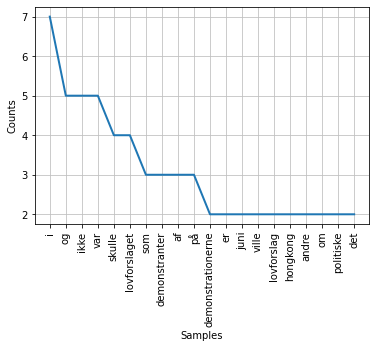

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [47]:
# lad os se på fordelingen af tags
nltk.FreqDist(pos_tags).plot(20)

#### Opgave: prøv at udskifte 'NN' med andre tags.

## Stopord

Stopord er småord, som ofte ikke er betydningsbærende ord.

Vi har defor brug for at indlæse stopordslister. De ligger i mappen stopwords.

Vi bruger os biblioteket til at navigere over i stopordsmappen. Hver kan det blive lidt indviklet, fordi når det kommer til at navigere mellem mapper, så er der en lille forskel på om, man sidder med en mac eller en pc.

Jeg sidder med en pc og skal bruge '\\' som separator i min sti til min mappe, men hvis du har en  mac, så skal du bruge '/' som din separator i i stedet. 

In [48]:
# find din separator
os.sep

'\\'

In [49]:
# find din nuværende mappe
os.getcwd()

'C:\\Users\\lakj\\kinastudier efterår 2022\\Lektion1\\stopwords'

In [50]:
# find ud af, hvad der ligger i mappen
os.listdir()

['de.txt', 'dk.txt', 'gb.txt']

In [51]:
# flyt dig hen i mappen med stopord
os.chdir('.\\stopwords')

FileNotFoundError: [WinError 2] Den angivne fil blev ikke fundet: '.\\stopwords'

In [52]:
# find din nuværende mappe igen
os.getcwd()

'C:\\Users\\lakj\\kinastudier efterår 2022\\Lektion1\\stopwords'

In [53]:
# find ud af, hvad der ligger i mappen - igen
os.listdir()

['de.txt', 'dk.txt', 'gb.txt']

Vi er klar til at indlæse vores stopord i tre forskellige variabler.

In [54]:
sw_de, sw_dk, sw_gb = [open(i, 'r', encoding='utf-8-sig').read().split() for i in os.listdir()]

Nu kan alle teksterne bliver filtreret for stopord.

In [55]:
filtered_tokens = []
for word in nltk_text:
    if word not in sw_dk and word.isalpha():
        filtered_tokens.append(word)

Med en ny ordliste, der ikke længere indeholder stopord, kan vi få overblik over, hvilke betydningsbærende ord, der flyder mest.

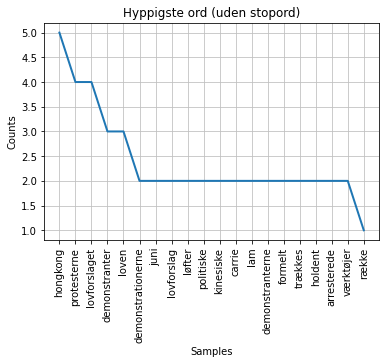

In [56]:
fdist_filtered = nltk.FreqDist(filtered_tokens).plot(20, title='Hyppigste ord (uden stopord)')

In [57]:
long_tokens = []

for word in filtered_tokens:
    if len(word) > 10:
        long_tokens.append(word)

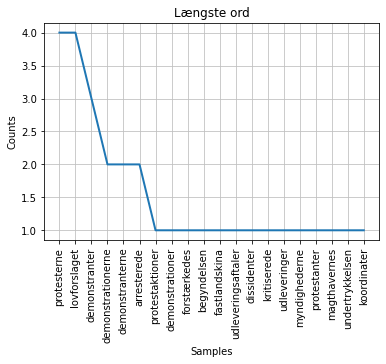

In [58]:
fdist_filtered = nltk.FreqDist(long_tokens).plot(20, title='Længste ord')

# NLTK metoder

collocation_list() returnerer en liste over de mest almindelige ordpar i teksten. Bemærk, at i nogle versioner af Python virker collocation_list() ikke. Hvis dette er tilfældet, prøv _collocations()_ i stedet.

In [59]:
nltk_text.collocation_list()

[('carrie', 'lam'),
 ('trækkes', 'tilbage'),
 ('formelt', 'skulle'),
 ('lovforslaget', 'formelt'),
 ('skulle', 'trækkes'),
 ('hongkong', '2019-2020'),
 ('lovforslaget', 'var')]

Concordance()-metoden returnerer konteksten af et specifikt udtryk. Længden af output kan ændres med parametrene i width og lines.

In [61]:
nltk_text.concordance('lovforslag', lines=30, width=80)

Displaying 2 of 2 matches:
d at demonstranter ville stoppe et lovforslag som skulle tillade udlevering af f
v-sendt indslag at det kritiserede lovforslag om udleveringer helt og holdent va


For at identificere ord, der optræder i en lignende kontekst, kan vi bruge metoden similar().

Jeg har en forestilling om at metoden giver bedre resultater jo længere teksten er.

In [63]:
nltk_text.similar('demonstranter')

loven


generate() metoden kan du bruge til at genere mere eller mindre sammenhængende tekst med udgangspunkt i en eksisterende tekst.

In [64]:
text_gen = nltk_text.generate(150)

mod demonstranter og at loven ville blive anvendt for at arrestere og
udlevere politiske dissidenter til det kinesiske regime den 15 marts
2019 og forstærkedes i begyndelsen af juni indledtes med at
demonstranter ville stoppe et lovforslag som skulle tillade udlevering
af formodede kriminelle fra hongkong til fastlandskina og andre
områder hvor udleveringsaftaler ikke findes i dag loven blev fremsat
af det pro-kinesiske styre i hongkong 2019-2020 demonstrationerne i
hongkong 2019-2020 er en række vedvarende protestaktioner og
demonstrationer i det centrale hongkong protesterne som begyndte den
15 marts 2019 og forstærkedes i begyndelsen af juni indledtes med at
demonstranter ville stoppe et lovforslag som skulle tillade udlevering
af formodede kriminelle fra hongkong til fastlandskina og andre
områder hvor udleveringsaftaler ikke findes i dag loven blev fremsat
af det pro-kinesiske styre i hongkong med løfter om at loven ville
blive anvendt for at arrestere og udlevere politiske dissid

Building ngram index...
